# First XGBoost Model

In [ ]:
import pickle
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data_path = '/home/naji/Desktop/github-repos/machine-learning/nbs/0-datasets/'
pima_file = 'pima-indians-diabetes.csv'

In [ ]:
seed = 7

In [ ]:
dataset = loadtxt(data_path+pima_file, delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
X = dataset[:, 0:8]
y = dataset[:, 8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)

In [ ]:
print(f'Accuracy is: {accuracy*100: .2f}')

Accuracy is:  74.02


**Visualize Individual Trees Within A Model**

In [ ]:
from xgboost import plot_tree
from matplotlib import pyplot

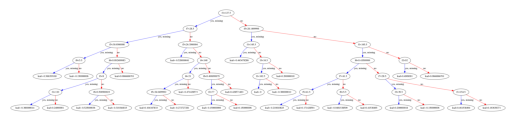

In [ ]:
plot_tree(model)
pyplot.show()

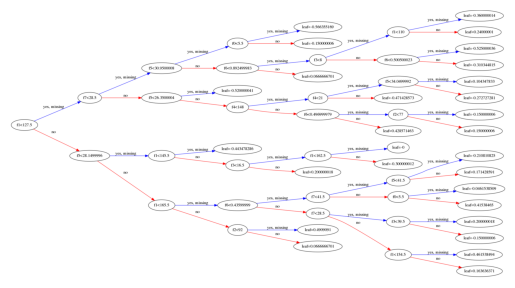

In [ ]:
plot_tree(model, num_trees=0, rankdir='LR')
pyplot.show()

In [ ]:
pickle.dump(model, open('models/pima.pickle.dat', 'wb'))
print('Saved model to: pima.pickle.dat')

In [ ]:
loadet_model = pickle.load(open('models/pima.pickle.dat', 'rb'))
print('Loaded model from: pima.pickle.dat')

Loaded model from: pima.pickle.dat


In [ ]:
predictions = loadet_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy is: {accuracy*100 : 0.2f}%')

Accuracy is:  74.02%


### Feature Importance With XGBoost and Feature Selection

**Manually Plot Feature Importance**

In [ ]:
print(model.feature_importances_)

[0.08907107 0.23959665 0.08799458 0.09824964 0.09801763 0.15170808
 0.09959181 0.13577053]


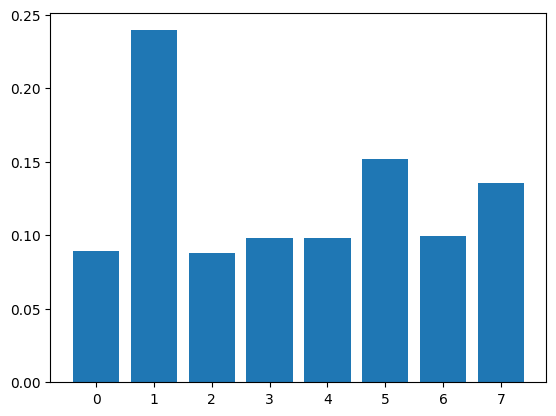

In [ ]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

**Using the Built-in XGBoost Feature Importance Plot**

In [ ]:
from xgboost import plot_importance

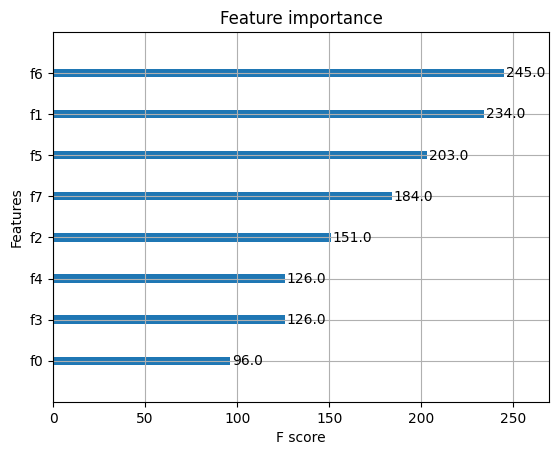

In [ ]:
plot_importance(model)
pyplot.show()

**Feature Selection with XGBoost Feature Importance Scores**

### Monitor Training Performance and Early Stopping

**Monitoring Training Performance With XGBoost**

In [ ]:
eval_set = [(X_test, y_test)]

In [ ]:
model = XGBClassifier(eval_metric='error')

In [ ]:
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.28346
[1]	validation_0-error:0.25984
[2]	validation_0-error:0.25591
[3]	validation_0-error:0.24803
[4]	validation_0-error:0.24409
[5]	validation_0-error:0.24803
[6]	validation_0-error:0.25591
[7]	validation_0-error:0.24803
[8]	validation_0-error:0.25591
[9]	validation_0-error:0.24409
[10]	validation_0-error:0.24803
[11]	validation_0-error:0.24409
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.24016
[14]	validation_0-error:0.23622
[15]	validation_0-error:0.24409
[16]	validation_0-error:0.25591
[17]	validation_0-error:0.23622
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.24409
[24]	validation_0-error:0.24409
[25]	validation_0-error:0.24016
[26]	validation_0-error:0.24409
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.25591
[29]	validation_0-error:0.25197
[30]	validation_0-error:0.24803
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy*100: .2f}')

Accuracy:  74.02


**Evaluate XGBoost Models With Learning Curves**

In [ ]:
model = XGBClassifier(eval_metric=['error', 'logloss'])

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [ ]:
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.13619	validation_0-logloss:0.55257	validation_1-error:0.28346	validation_1-logloss:0.60491
[1]	validation_0-error:0.10895	validation_0-logloss:0.46754	validation_1-error:0.25984	validation_1-logloss:0.55934
[2]	validation_0-error:0.10506	validation_0-logloss:0.40734	validation_1-error:0.25591	validation_1-logloss:0.53068
[3]	validation_0-error:0.09144	validation_0-logloss:0.36480	validation_1-error:0.24803	validation_1-logloss:0.51795
[4]	validation_0-error:0.08560	validation_0-logloss:0.33012	validation_1-error:0.24409	validation_1-logloss:0.51153
[5]	validation_0-error:0.07782	validation_0-logloss:0.29868	validation_1-error:0.24803	validation_1-logloss:0.50934
[6]	validation_0-error:0.06809	validation_0-logloss:0.27852	validation_1-error:0.25591	validation_1-logloss:0.50818
[7]	validation_0-error:0.06615	validation_0-logloss:0.26182	validation_1-error:0.24803	validation_1-logloss:0.51097
[8]	validation_0-error:0.06226	validation_0-logloss:0.24578	validation_1

[71]	validation_0-error:0.00000	validation_0-logloss:0.03907	validation_1-error:0.26772	validation_1-logloss:0.72573
[72]	validation_0-error:0.00000	validation_0-logloss:0.03835	validation_1-error:0.26772	validation_1-logloss:0.72761
[73]	validation_0-error:0.00000	validation_0-logloss:0.03762	validation_1-error:0.26772	validation_1-logloss:0.72992
[74]	validation_0-error:0.00000	validation_0-logloss:0.03719	validation_1-error:0.26772	validation_1-logloss:0.73336
[75]	validation_0-error:0.00000	validation_0-logloss:0.03669	validation_1-error:0.26772	validation_1-logloss:0.73444
[76]	validation_0-error:0.00000	validation_0-logloss:0.03632	validation_1-error:0.26772	validation_1-logloss:0.73795
[77]	validation_0-error:0.00000	validation_0-logloss:0.03588	validation_1-error:0.27165	validation_1-logloss:0.74054
[78]	validation_0-error:0.00000	validation_0-logloss:0.03521	validation_1-error:0.26772	validation_1-logloss:0.74512
[79]	validation_0-error:0.00000	validation_0-logloss:0.03464	val

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['error', 'logloss'], feature_types=None, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy*100 : 0.2f}%')

Accuracy:  74.02%


In [ ]:
results = model.evals_result()

In [ ]:
epochs = len(results['validation_0']['error'])

In [ ]:
x_axis = range(0, epochs)

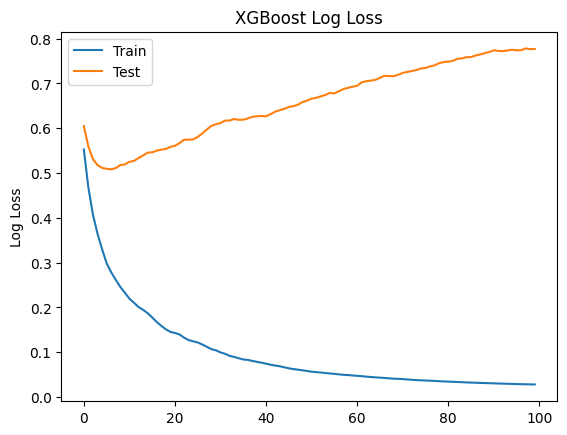

In [ ]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

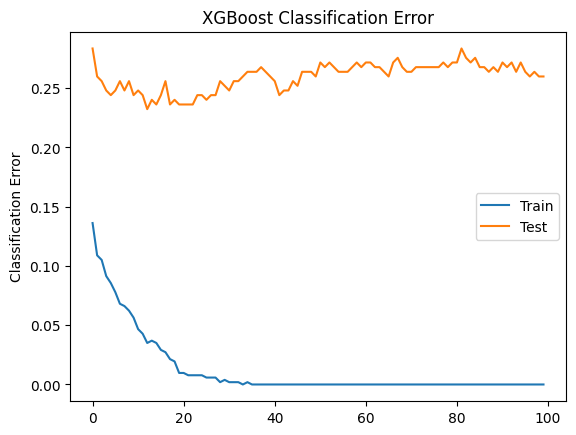

In [ ]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label= 'Train')
ax.plot(x_axis, results['validation_1']['error'], label= 'Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

**Early Stopping With XGBoost**

In [ ]:
model = XGBClassifier(eval_metric='logloss')

In [ ]:
eval_set = [(X_test, y_test)]

In [ ]:
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.60491
[1]	validation_0-logloss:0.55934
[2]	validation_0-logloss:0.53068
[3]	validation_0-logloss:0.51795
[4]	validation_0-logloss:0.51153
[5]	validation_0-logloss:0.50934
[6]	validation_0-logloss:0.50818
[7]	validation_0-logloss:0.51097
[8]	validation_0-logloss:0.51760
[9]	validation_0-logloss:0.51912
[10]	validation_0-logloss:0.52503
[11]	validation_0-logloss:0.52697
[12]	validation_0-logloss:0.53335
[13]	validation_0-logloss:0.53905
[14]	validation_0-logloss:0.54545
[15]	validation_0-logloss:0.54613


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Tune Multithreading Support for XGBoost

# XGBoost Tuning

### Tune the Number and Size of Decision Trees with XGBoost

In [ ]:
import matplotlib
from matplotlib import pyplot
from pandas import read_csv
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [ ]:
matplotlib.use('Agg')

**Tune the Number of Decision Trees**

In [ ]:
file_path = '/home/naji/Desktop/github-repos/machine-learning/nbs/0-datasets/otto/'

In [ ]:
data = read_csv(file_path + 'train.csv')
data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,0,0,1,3,0,0,9,0,2,0,0,0,7,0,3,6,1,0,0,65,1,0,4,3,1,1,1,2,1,0,...,3,1,0,0,0,1,0,22,0,1,4,11,3,0,0,3,0,1,1,2,0,0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,2,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,2,0,0,1,5,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,...,0,0,0,0,19,0,0,4,0,0,0,0,18,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,1,0,0,1,2,0,0,2,1,0,0,5,0,0,0,...,0,0,1,0,0,0,0,2,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,10,0,Class_9


In [ ]:
dataset = data.values

In [ ]:
X = dataset[:, 0:94]
y = dataset[:, 94]

In [ ]:
label_encoded_y = LabelEncoder().fit_transform(y)

In [ ]:
model = XGBClassifier()

In [ ]:
n_estimators = range(50, 150, 50)

In [ ]:
param_grid = dict(n_estimators=n_estimators)

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss', cv=kfold)

In [ ]:
grid_result = grid_search.fit(X, label_encoded_y)

KeyboardInterrupt: 

In [ ]:
# summarize results
print(f'Best: {}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean} ({stdev}) with {param}')

In [ ]:
pyplott.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

**Tune the Size of Decision Trees**

In [ ]:
model = XGBClassifier()

In [ ]:
max_depth = range(1, 5, 2)

In [ ]:
param_grid = dict(max_depth=max_depth)

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss', cv=kfold, verbose=1)

In [ ]:
grid_result = grid_search.fit(X, label_encoded_y)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


KeyboardInterrupt: 

In [ ]:
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

In [ ]:
# summarize results
print(f'Best: {}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

**Tune The Number and Size of Trees**

### Tune Learning Rate and Number of Trees with XGBoost

### Tuning Stochastic Gradient Boosting with XGBoost